# Categorical Boosting (CatBoost) -  Forecasting

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import catboost
import os
import pandas as pd
from tqdm import tqdm

## Dataset - Daily consumption of fruit & vegetables in Europe

The dataset can be found [here](https://www.kaggle.com/gpreda/daily-consumption-of-fruit-vegetables-in-europe), authored by Gabriel Preda

In [4]:
dataframe = pd.read_csv('datasets/daily_consumption_fruit_vegetables_eu.csv')
dataframe.head()

,unit,n_portion,sex,age,country,time,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


Remove NaN values

In [67]:
dataframe = dataframe.dropna()

Plot dataset

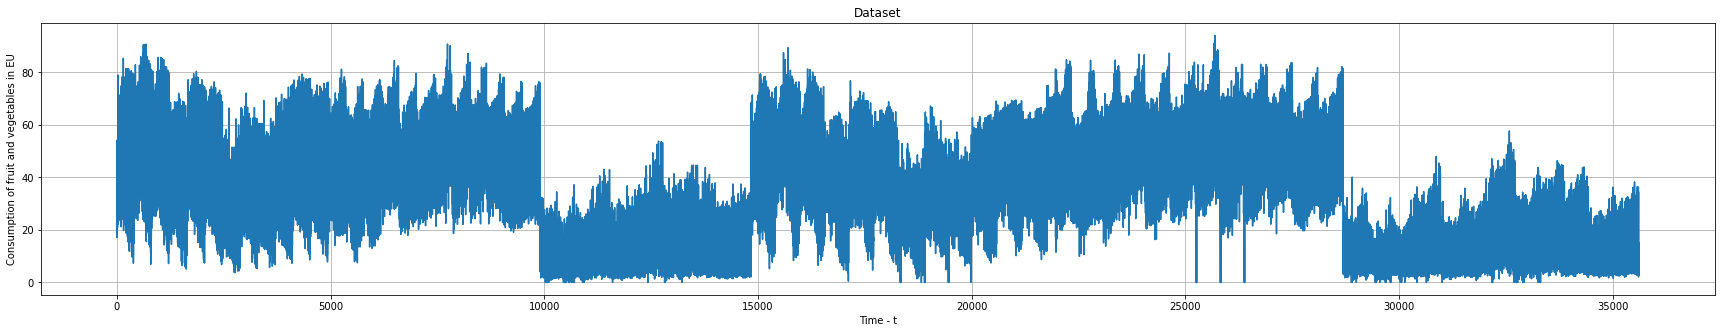

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,5))
ax.plot(dataframe['value'].values)
ax.set_xlabel('Time - t')
ax.set_ylabel('Consumption of fruit and vegetables in EU')
ax.set_title('Dataset')
ax.grid()

plt.show()

Build sequences

In [89]:
def get_sequence(dataframe, t=12):
    x = np.zeros((dataframe.shape[0]//t, t))
    y = np.zeros((dataframe.shape[0]//t, 1))
    
    val = dataframe['value'].values
    
    for i in tqdm(range(dataframe.shape[0]//t -1)):
        x[i,:] = val[i*t:(i+1)*t]
        y[i,0] = val[(1+i)*t]
    
    return x,y

x, y = get_sequence(training, t=3)

print(x.shape, y.shape)

100%|███████████████████████████████████| 6922/6922 [00:00<00:00, 431441.19it/s]

(6923, 3) (6923, 1)


## Define the CatBoost Regressor

In [90]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(
            iterations=20000,
            task_type='CPU',
            learning_rate=0.002,
            loss_function='MultiRMSE',
            random_seed=101,
            max_depth=6,
            eval_metric='MultiRMSE',
            verbose = True,
            early_stopping_rounds = 1000
        )

Train the CatBoost Regressor

In [ ]:
regressor.fit(x, y)

Save trained model

In [92]:
regressor.save_model(os.path.join('weights', 'forecasting'))
#regressor.load_model(os.path.join('weights', 'forecasting'))

Apply the trained regressor

In [93]:
y_p = regressor.predict(x)

Plot results

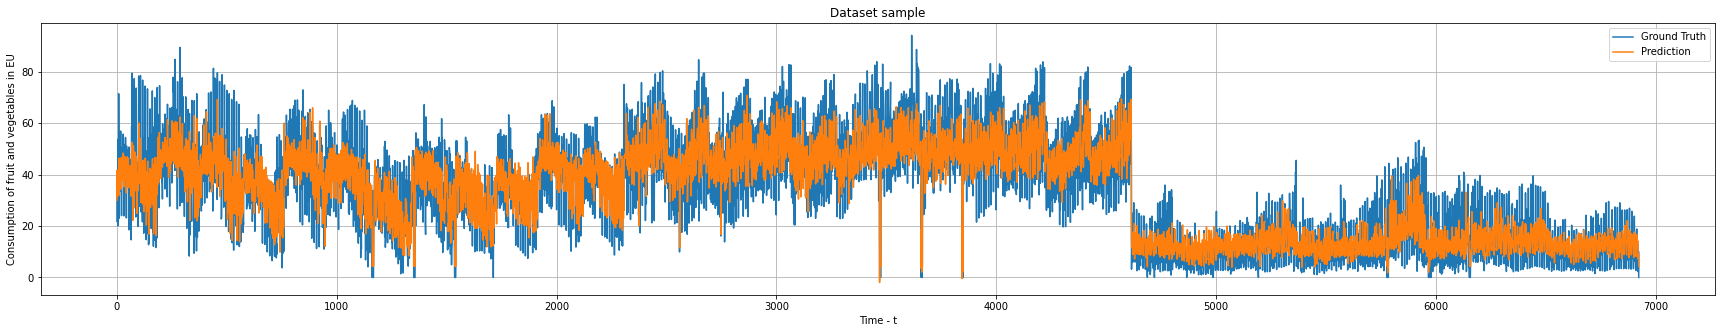

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,5))
ax.plot(y, label='Ground Truth')
ax.plot(y_p, label='Prediction')

ax.set_xlabel('Time - t')
ax.set_ylabel('Consumption of fruit and vegetables in EU')
ax.set_title('Dataset sample')
ax.legend()
ax.grid()
plt.show()
plt.close()